In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [2]:
dataset = pd.read_csv(r'd:\00 - Woxsen\MBA (Business Analytics)\Term 3 - Subjects\Machine Learning for Business\05Mar25\suv_data.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
# Check for missing values
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
# Convert categorical variable 'Gender' to numeric using one-hot encoding
df_1 = pd.get_dummies(dataset['Gender'], drop_first=True).astype(int)
df_2 = pd.concat([dataset, df_1], axis=1)

In [16]:
# Selecting features and target variable
X = df_2.iloc[:, [2, 3, 5]].values  # Include encoded gender
Y = df_2.iloc[:, 4].values  # Target variable

In [17]:
# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [19]:
# Predictions
Y_pred = model.predict(X_test)

In [20]:
# Model evaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9125
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



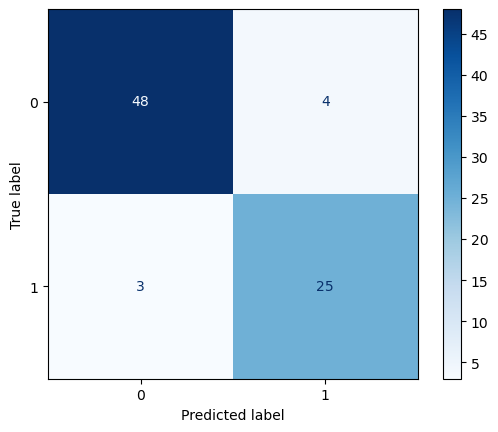

In [25]:
# Confusion matrix
display = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, cmap='Blues')
plt.show()

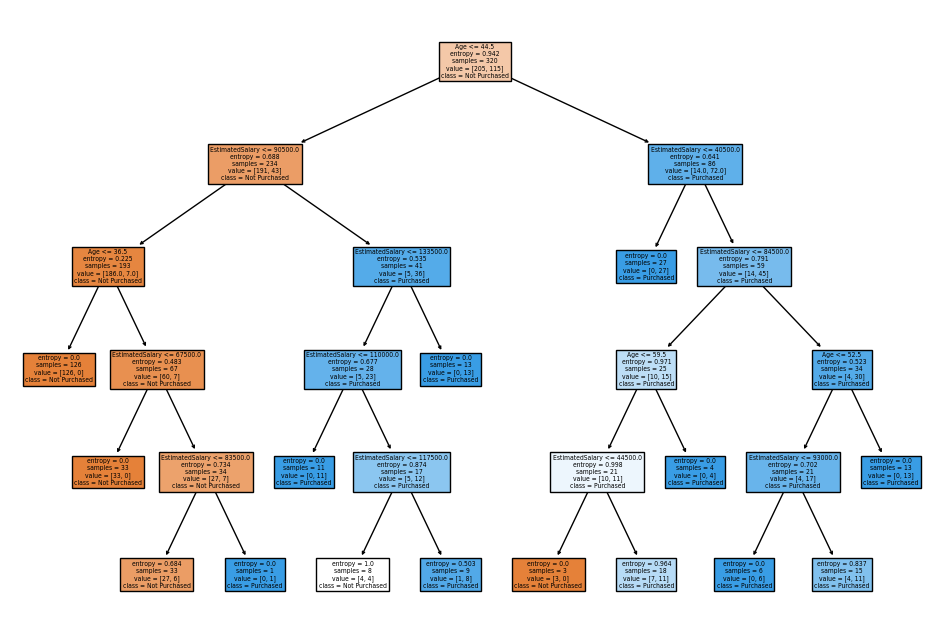

In [23]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['Age', 'EstimatedSalary', 'Gender_Male'], class_names=['Not Purchased', 'Purchased'])
plt.show()